In [1]:
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data_train=pd.read_csv("C:/Users/shinj/Downloads/TweetData/train.csv")

In [3]:
data_test=pd.read_csv("C:/Users/shinj/Downloads/TweetData/test.csv")

In [4]:
data_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
data_train.count(axis='columns')

0        3
1        3
2        3
3        3
4        3
        ..
31957    3
31958    3
31959    3
31960    3
31961    3
Length: 31962, dtype: int64

In [7]:
data_train.shape

(31962, 3)

In [8]:
sum(data_train['label']==1)

2242

In [9]:
sum(data_train['label']==0)

29720

In [10]:
data_train.dropna()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [11]:
import preprocessor as tp
import re

In [12]:
replace_nospace=re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
replace_wspace=re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def tweetClean(data):
    temp=[]
    for line in data:
        tempL=tp.clean(line)
        tempL=replace_nospace.sub("",tempL.lower())
        tempL=replace_wspace.sub("",tempL)
        temp.append(tempL)
    return temp
tweet_train=tweetClean(data_train["tweet"])
tweet_train=pd.DataFrame(tweet_train)

In [13]:
data_train["tweet_clean"]=tweet_train

In [14]:
data_train["tweet_clean"]

0        when a father is dysfunctional and is so selfi...
1        thanks for credit i cant use cause they dont o...
2                                      bihday your majesty
3                  i love u take with u all the time in ur
4                                   factsguide society now
                               ...                        
31957                                   ate isz that youuu
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960                       vandalised in in  condemns act
31961                             thank you for you follow
Name: tweet_clean, Length: 31962, dtype: object

In [15]:
tweet_test=tweetClean(data_test["tweet"])
tweet_test=pd.DataFrame(tweet_test)
data_test["tweet_clean"]=tweet_test
data_test["tweet_clean"]

0                                                  to find
1               want everyone to see the new and heres why
2                                 safe ways to heal your  
3        is the hp and the cursed child book up for res...
4        rd to my amazing hilarious eli ahmir uncle dav...
                               ...                        
17192          thought factory leftright polarisation &gt3
17193                               feeling like a mermaid
17194    today in omg &amp used words like assets&ampli...
17195    happy at work conference right mindset leads t...
17196                        my song so glad free download
Name: tweet_clean, Length: 17197, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = data_train.label.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_train.tweet_clean.values, y, stratify=y, random_state=1, test_size=0.15, shuffle=True)

In [19]:
print (X_train.shape)
print (y_train.shape)

(27167,)
(27167,)


In [20]:
print(X_test.shape)
print(y_test.shape)

(4795,)
(4795,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(binary=True, stop_words='english')

In [23]:
vectorizer.fit(list(X_train) + list(X_test))

CountVectorizer(binary=True, stop_words='english')

In [24]:
x_train_vec = vectorizer.transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [25]:
x_train_vec

<27167x22878 sparse matrix of type '<class 'numpy.int64'>'
	with 130903 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn import svm

In [95]:
svm = svm.SVC(kernel = 'rbf', probability=True)

In [96]:
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

In [97]:
y_pred_svm = svm.predict(x_test_vec)

In [30]:
from sklearn.metrics import accuracy_score

In [98]:
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.93222106360793 %


In [99]:
pred_svm=svm.predict_proba(x_test_vec)

In [33]:
from sklearn.metrics import precision_score

In [100]:
precision_score(y_test, y_pred_svm)

0.979381443298969

### Trying Other Algorithms for better Accuracy Score
#### Even though SVM offers an accuracy metric exceeding 95.39%, it is worth trying to see if Logistic Regression or Random Forest offer better accuracy at flagging hate tweets

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression


In [35]:
logReg = LogisticRegression()

In [36]:
logReg.fit(x_train_vec,y_train)

LogisticRegression()

In [37]:
predictions = logReg.predict(x_test_vec)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Accuracy score for Logistic Regression is: ", accuracy_score(y_test, predictions) * 100, '%')

Accuracy score for Logistic Regression is:  95.22419186652763 %


In [40]:
pred_logreg = logReg.predict_proba(x_test_vec)

In [60]:
precision_score(y_test, predictions, average='binary')

0.8905109489051095

#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randForest = RandomForestClassifier(n_estimators = 100) 

In [43]:
randForest.fit(x_train_vec, y_train)

RandomForestClassifier()

In [44]:
pred_forest=randForest.predict(x_test_vec)

In [45]:
print("Accuracy score for Random Forest is: ", accuracy_score(y_test, pred_forest) * 100, '%')

Accuracy score for Random Forest is:  95.07820646506778 %


In [46]:
pred_rf=randForest.predict_proba(x_test_vec)

In [76]:
precision_score(y_test, pred_forest, average='binary')

0.7314814814814815

### Results Comparison

In [47]:
from sklearn.metrics import roc_curve

In [101]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_svm[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_logreg[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_rf[:,1], pos_label=1)

In [102]:
random_probs = [0 for i in range(len(y_test))]

In [103]:
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [104]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

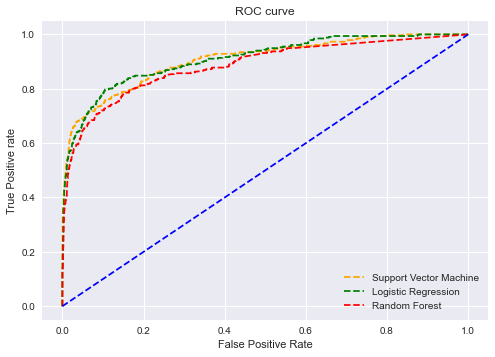

In [105]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Support Vector Machine')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [107]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [108]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test,pred_logreg[:,1])

In [110]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, pred_svm[:,1])

In [111]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test,pred_rf[:,1])

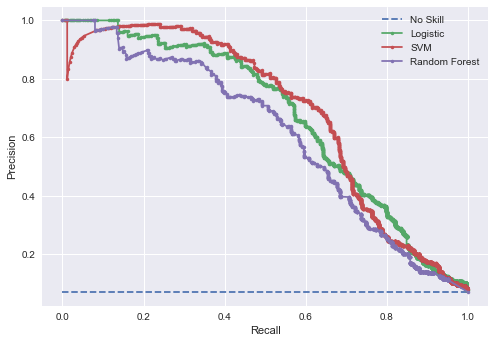

In [122]:
from matplotlib import pyplot
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.plot(svm_recall, svm_precision, marker='.', label='SVM')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()